# World Layoffs Dataset - Comprehensive Exploratory Data Analysis
In this notebook, we will perform a detailed exploratory data analysis (EDA) on the World Layoffs dataset.

### Steps to be covered:
- **Data Loading**
- **Layoffs By Industry**
- **Trends in Layoffs over Time**
- **Layoffs By Stage of Funding**
- **Countries with The Most Layoffs**
- **Additional Analysis**
- **Insights and Recommendations**

## 1. Data Loading

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd  # For geographic analysis
from datetime import datetime

# Load the dataset 
df = pd.read_csv('layoffs_staging2.csv')

# Display the first few rows
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Included Health,SF Bay Area,Healthcare,0,0.06,2022-07-25,Series E,United States,272
1,&Open,Dublin,Marketing,9,0.09,2022-11-17,Series A,Ireland,35
2,#Paid,Toronto,Marketing,19,0.17,2023-01-27,Series B,Canada,21
3,100 Thieves,Los Angeles,Consumer,12,NaN,2022-07-13,Series C,United States,120
4,10X Genomics,SF Bay Area,Healthcare,100,0.08,2022-08-04,Post-IPO,United States,242


## 2. Layoffs By Industry

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18056\1125205735.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_layoffs, y='industry', x='total_laid_off', palette='coolwarm')


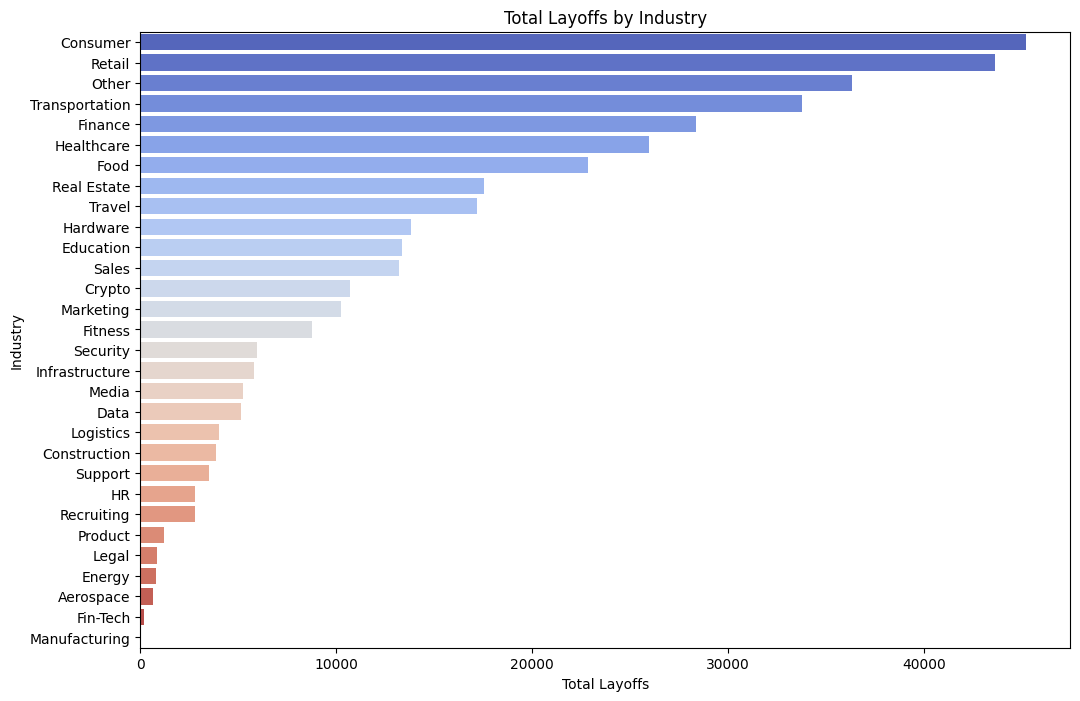

In [2]:
# Summing layoffs by industry
industry_layoffs = df.groupby('industry')['total_laid_off'].sum().reset_index()

# Sorting in descending order by total layoffs
industry_layoffs = industry_layoffs.sort_values(by='total_laid_off', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=industry_layoffs, y='industry', x='total_laid_off', palette='coolwarm')
plt.title('Total Layoffs by Industry')
plt.xlabel('Total Layoffs')
plt.ylabel('Industry')
plt.show()

## 3. Trends in Layoffs Over Time

### Layoffs By Month

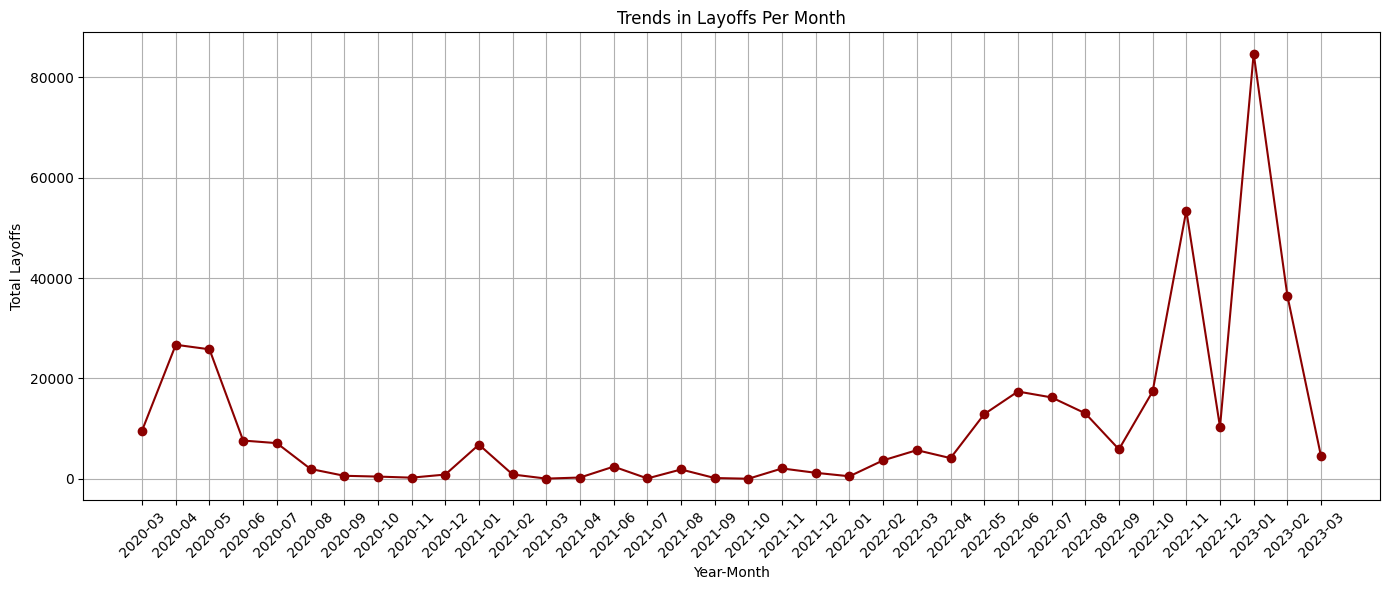

In [3]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year-month (equivalent to SQL's SUBSTRING(date, 1, 7))
df['year_month'] = df['date'].dt.to_period('M')

# Group by year-month and sum the layoffs
layoffs_by_month = df.groupby('year_month')['total_laid_off'].sum().reset_index()

# Visualization
plt.figure(figsize=(14, 6))
plt.plot(layoffs_by_month['year_month'].astype(str), layoffs_by_month['total_laid_off'], marker='o', color='darkred')
plt.title('Trends in Layoffs Per Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Layoffs By Year

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18056\3842466228.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=layoffs_by_year, x='year', y='total_laid_off', palette='mako')


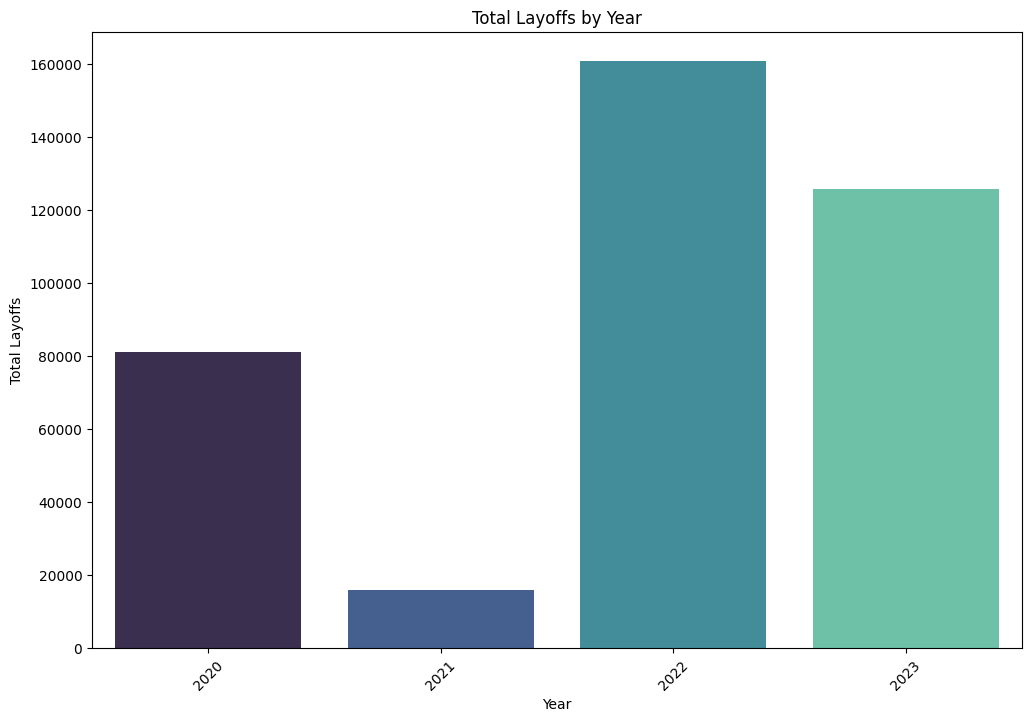

   year  total_laid_off
3  2023          125677
2  2022          160661
1  2021           15823
0  2020           80998


In [4]:
# Ensure the 'date' column is in datetime format, with errors set to 'coerce' to handle invalid dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Convert the 'year' column to integer type to avoid float representation
df['year'] = df['year'].astype('Int64')  # Using 'Int64' to handle missing values as 'NaN'

# Group by 'year' and sum the 'total_laid_off' for each year
layoffs_by_year = df.groupby('year')['total_laid_off'].sum().reset_index()

# Sort by year in descending order
layoffs_by_year = layoffs_by_year.sort_values(by='year', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=layoffs_by_year, x='year', y='total_laid_off', palette='mako')
plt.title('Total Layoffs by Year')
plt.xlabel('Year')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.show()

# Optional: Print the DataFrame to compare with the SQL output
print(layoffs_by_year)

## 4. Layoffs By Stage of Funding

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18056\3134845172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=layoffs_by_stage, x='stage', y='total_laid_off', palette='magma')


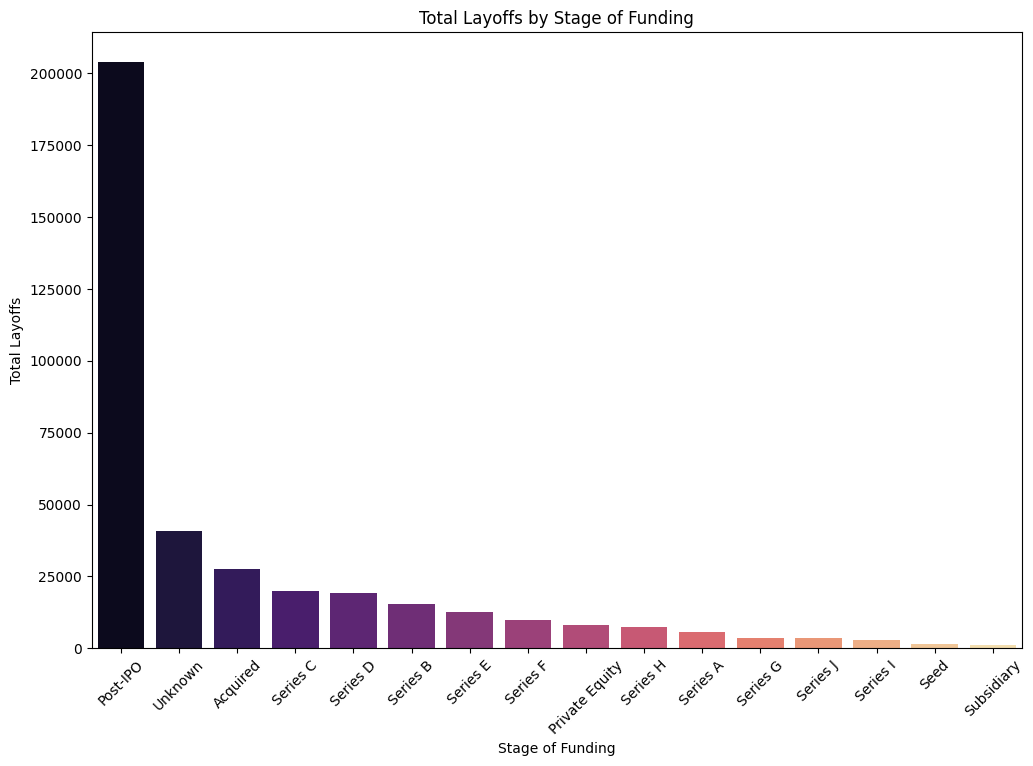

             stage  total_laid_off
1         Post-IPO          204132
15         Unknown           40716
0         Acquired           27576
6         Series C           20017
7         Series D           19225
5         Series B           15311
8         Series E           12697
9         Series F            9932
2   Private Equity            7957
11        Series H            7244
4         Series A            5678
10        Series G            3697
13        Series J            3570
12        Series I            2855
3             Seed            1636
14      Subsidiary            1094


In [5]:
# Group by 'stage' and sum the 'total_laid_off' for each stage
layoffs_by_stage = df.groupby('stage')['total_laid_off'].sum().reset_index()

# Sort by 'total_laid_off' in descending order
layoffs_by_stage = layoffs_by_stage.sort_values(by='total_laid_off', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=layoffs_by_stage, x='stage', y='total_laid_off', palette='magma')
plt.title('Total Layoffs by Stage of Funding')
plt.xlabel('Stage of Funding')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.show()

# Optional: Print the DataFrame to compare with the SQL output
print(layoffs_by_stage)

## 5. Countries with the Most Layoffs

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18056\2561760324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=layoffs_by_country.head(10), x='country', y='total_laid_off', palette='plasma')


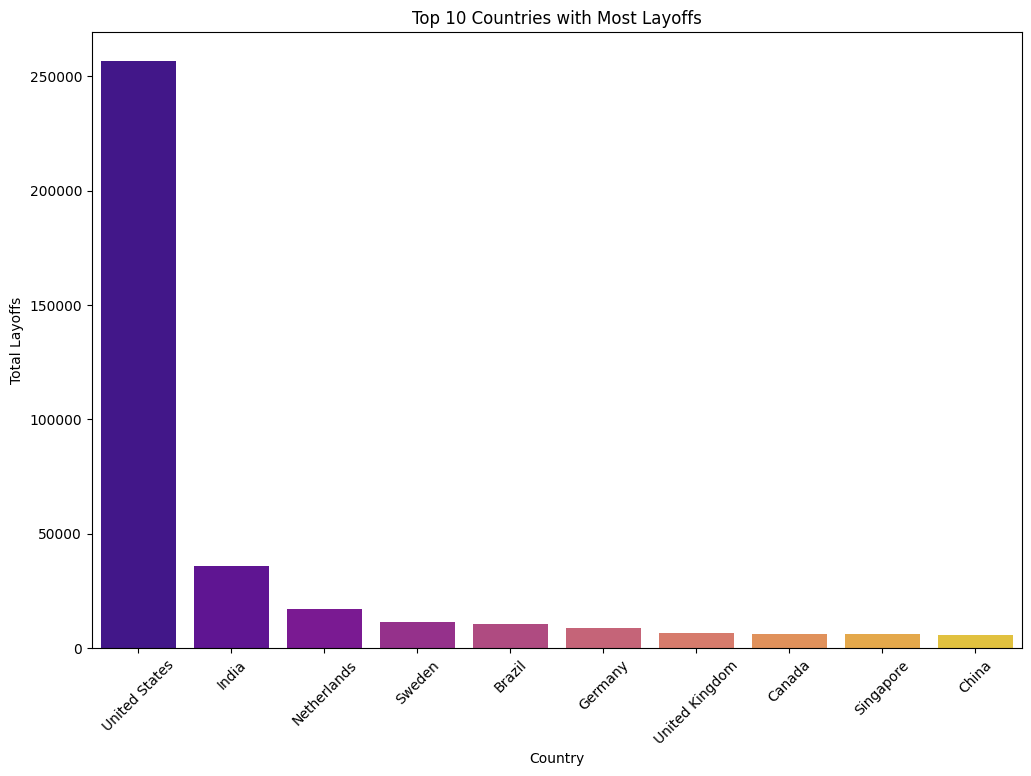

           country  total_laid_off
49   United States          256559
17           India           35993
29     Netherlands           17220
43          Sweden           11264
3           Brazil           10391
14         Germany            8701
48  United Kingdom            6398
5           Canada            6319
40       Singapore            5995
7            China            5905


In [6]:
# Group by 'country' and sum the 'total_laid_off' for each country
layoffs_by_country = df.groupby('country')['total_laid_off'].sum().reset_index()

# Sort by 'total_laid_off' in descending order
layoffs_by_country = layoffs_by_country.sort_values(by='total_laid_off', ascending=False)

# Plot the top 10 countries with the most layoffs
plt.figure(figsize=(12, 8))
sns.barplot(data=layoffs_by_country.head(10), x='country', y='total_laid_off', palette='plasma')
plt.title('Top 10 Countries with Most Layoffs')
plt.xlabel('Country')
plt.ylabel('Total Layoffs')
plt.xticks(rotation=45)
plt.show()

# Optional: Print the top 10 countries with the most layoffs
print(layoffs_by_country.head(10))

## 6. Additional Analysis

### Companies with 100% layoffs

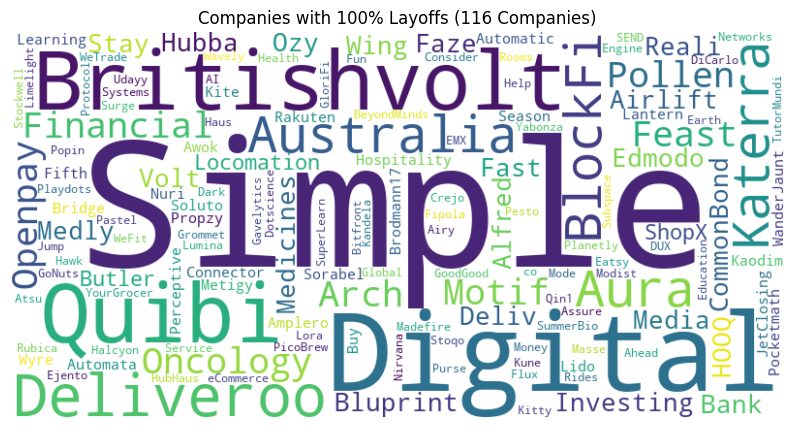

In [7]:
from wordcloud import WordCloud

# Filter companies with 100% layoffs
companies_100_percent = df[df['percentage_laid_off'] == 1.0]

# Sort the filtered companies by 'funds_raised_millions' in descending order
companies_100_percent_sorted = companies_100_percent.sort_values(by='funds_raised_millions', ascending=False)

# Create a word cloud of company names with 100% layoffs
companies_list = companies_100_percent_sorted['company'].unique()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(companies_list))

# Get the number of companies with 100% layoffs
num_companies_100_percent = len(companies_100_percent_sorted)

# Display the word cloud with the number of companies in the title
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Companies with 100% Layoffs ({num_companies_100_percent} Companies)')
plt.show()

### Companies with the most total layoffs

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18056\1027770551.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_layoffs, x='company', y='total_laid_off', palette='Blues_d')


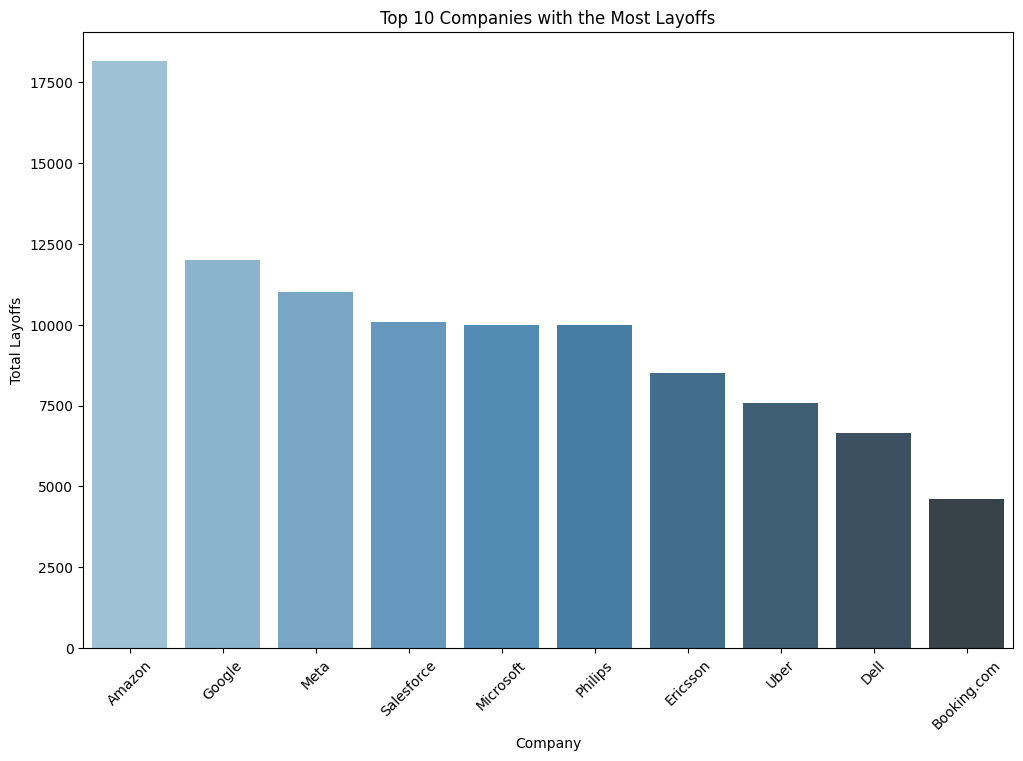

          company  total_laid_off
53         Amazon           18150
579        Google           12000
875          Meta           11000
1197   Salesforce           10090
878     Microsoft           10000
1055      Philips           10000
462      Ericsson            8500
1457         Uber            7585
389          Dell            6650
180   Booking.com            4601


In [8]:
# Group the data by company and sum the total layoffs
most_layoffs = df.groupby('company')['total_laid_off'].sum().reset_index()

# Sort the data by total layoffs in descending order
most_layoffs_sorted = most_layoffs.sort_values(by='total_laid_off', ascending=False)

# Get the top 10 companies with the most layoffs
top_10_layoffs = most_layoffs_sorted.head(10)

# Display the result
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_layoffs, x='company', y='total_laid_off', palette='Blues_d')
plt.title('Top 10 Companies with the Most Layoffs')
plt.xlabel('Company')
plt.ylabel('Total Layoffs')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

# Display the top 10 companies with the most layoffs
print(top_10_layoffs)

## 7. Insights and Recommendations
**Key Findings:**
- Industries like **Consumer** and **Retail** experienced the highest number of layoffs, whereas **Fin-tech** and **Manufacturing** were among those that experienced the least.
- Trends in layoffs show a spike in **early 2020**, just around the time the **COVID-19 pandemic** started, and later on toward the **end of 2022 and early 2023**, with the peak month for layoffs coming in **January 2023**.
- Yearly, **2022** had the highest layoffs, with **2023** coming as a close second, even though it only factors in **3 months of data**! This could indicate that 2023 is well going to surpass the previous year in the amount of layoffs.
- Companies at the **Post-IPO** stage of funding experienced a **significant** amount of layoffs, showing vulnerabilities for companies at this stage, with other stages experiencing **relatively moderate** layoffs in comparison.
- Layoffs were concentrated in countries like **United States** and **India**
- Companies with 100% layoffs were identified for further investigation. There were **116 companies** that went out of business during this period
- Among companies that didn't go out of business, **Amazon** led with the highest total layoffs, with **Google** coming in at a slightly distant second.

**Recommendations:**
- Focus on providing support to industries and regions most affected.
- Monitor companies at specific funding stages for early signs of mass layoffs. Especially companies at the **Post-IPO** stage.
- Improve data collection for more granular analysis.